In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import os
import seaborn as sns
from keras.applications.inception_v3 import InceptionV3  # Import InceptionV3

In [5]:
# Read input images and assign labels based on folder names
print(os.listdir("F:/indhu/Datasets/Tomato fruits dataset for binary and multiclass classification/Data/"))

['Three Classes', 'Two Classes']


In [6]:
SIZE = 256  # Resize images

# Capture training data and labels into respective lists
train_images = []
train_labels = [] 

In [7]:
for directory_path in glob.glob("F:/indhu/Datasets/Tomato fruits dataset for binary and multiclass classification/Data/Two Classes/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

Healthy
F:/indhu/Datasets/Tomato fruits dataset for binary and multiclass classification/Data/Two Classes\Healthy\healthy (10).jpg
F:/indhu/Datasets/Tomato fruits dataset for binary and multiclass classification/Data/Two Classes\Healthy\healthy (1003).jpg
F:/indhu/Datasets/Tomato fruits dataset for binary and multiclass classification/Data/Two Classes\Healthy\healthy (1007).jpg
F:/indhu/Datasets/Tomato fruits dataset for binary and multiclass classification/Data/Two Classes\Healthy\healthy (1008).jpg
F:/indhu/Datasets/Tomato fruits dataset for binary and multiclass classification/Data/Two Classes\Healthy\healthy (101).jpg
F:/indhu/Datasets/Tomato fruits dataset for binary and multiclass classification/Data/Two Classes\Healthy\healthy (1010).jpg
F:/indhu/Datasets/Tomato fruits dataset for binary and multiclass classification/Data/Two Classes\Healthy\healthy (1011).jpg
F:/indhu/Datasets/Tomato fruits dataset for binary and multiclass classification/Data/Two Classes\Healthy\healthy (1012)

In [8]:
# Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [9]:
# Capture test/validation data and labels into respective lists
test_images = []
test_labels = [] 
for directory_path in glob.glob("F:/indhu/Datasets/Tomato fruits dataset for binary and multiclass classification/Data/Two Classes/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)

In [10]:
# Convert lists to arrays                
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [11]:
# Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [12]:
# Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [13]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0


In [14]:
# One hot encode y values for neural network. 
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [15]:
# Load InceptionV3 model without classifier/fully connected layers
Inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

In [16]:
# Make loaded layers non-trainable. This is important as we want to work with pre-trained weights
for layer in Inception_model.layers:
    layer.trainable = False

Inception_model.summary()  # Trainable parameters will be 0

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 127, 127,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 127, 127,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 127, 127,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 125, 125,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 125, 125,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 62, 62,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 62, 62,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 62, 62,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 62, 62,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 60, 60,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 60, 60,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 60, 60,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [17]:
# Now, let us use features from convolutional network for RF
feature_extractor = Inception_model.predict(x_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)
X_for_SVM = features 

75/75 ━━━━━━━━━━━━━━━━━━━━ 42s 520ms/step


In [32]:
# SVM
from sklearn.svm import SVC
SVM_model = SVC(kernel='linear', random_state=42)  # You can change the kernel (e.g., 'rbf') if needed

In [31]:
# Train the model on training data
SVM_model.fit(X_for_SVM, y_train)  # SVM doesn't need one-hot encoding, similar to RF

SVC(kernel='linear', random_state=42)

In [20]:
X_test_feature = Inception_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

75/75 ━━━━━━━━━━━━━━━━━━━━ 37s 489ms/step


In [21]:
# Now predict using the trained SVM model
prediction_SVM = SVM_model.predict(X_test_features)

In [22]:
# Inverse transform to get original label back
prediction_SVM = le.inverse_transform(prediction_SVM)

In [23]:
# Print overall accuracy
from sklearn import metrics
print("Accuracy = ", metrics.accuracy_score(test_labels, prediction_SVM))

Accuracy =  0.9987494789495623


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


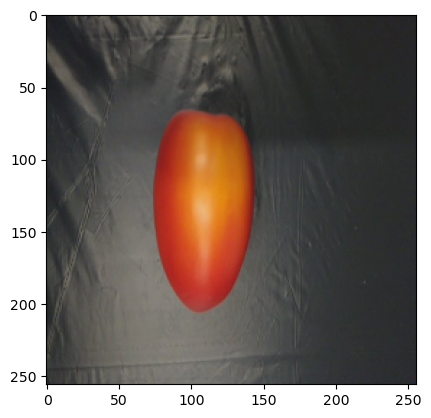

In [28]:
# Check results on a few select images
n = np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0)  # Expand dims so the input is (num images, x, y, c)
input_img_feature = Inception_model.predict(input_img)
input_img_features = input_img_feature.reshape(input_img_feature.shape[0], -1)


In [29]:
# Predict using the SVM model for the selected image
prediction_SVM = SVM_model.predict(input_img_features)[0]
prediction_SVM = le.inverse_transform([prediction_SVM])  # Reverse the label encoder to original name

print("The prediction for this image is: ", prediction_SVM)
print("The actual label for this image is: ", test_labels[n])

The prediction for this image is:  ['Healthy']
The actual label for this image is:  Healthy
